**Clone YOLO10 to local**

In [1]:
!git clone https://github.com/THU-MIG/yolov10.git

Cloning into 'yolov10'...


In [2]:
%cd yolov10
%pip install -q -r requirements.txt
%pip install -e

d:\OneDrive\PythonAI_Course\Projects_module1\YOLOv10_helmet\yolov10
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Users\Tung Tong\.conda\envs\newenv\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Users\Tung Tong\.conda\envs\newenv\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Users\Tung Tong\.conda\envs\newenv\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Users\Tung Tong\.conda\envs\newenv\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Users\Tung Tong\.conda\envs\newenv\python.exe -m pip install [options] <archive url/path> ...

-e option requires 1 argument


**Khởi tạo mô hình với trọng số đã có**

In [3]:
from ultralytics import YOLOv10

c:\Users\Tung Tong\.conda\envs\newenv\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [4]:
# Load model
MODEL_PATH = 'yolov10n.pt'
model = YOLOv10(MODEL_PATH)

**Tải ảnh cần dự đoán**

In [5]:
IMG_PATH = '../images/HCMC_Street.jpg'
result = model(IMG_PATH)[0]


image 1/1 d:\OneDrive\PythonAI_Course\Projects_module1\YOLOv10_helmet\yolov10\..\images\HCMC_Street.jpg: 448x640 8 persons, 2 bicycles, 1 car, 2 motorcycles, 1 backpack, 210.8ms
Speed: 4.0ms preprocess, 210.8ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


**Save and Display predicted results**

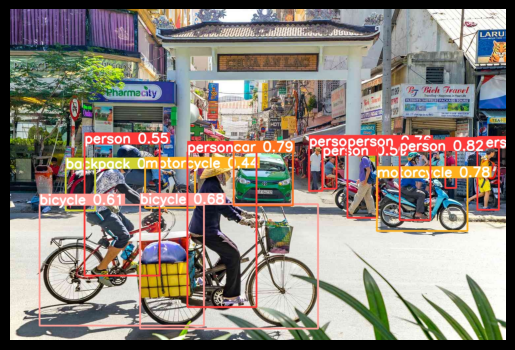

In [6]:
# Save the result
result.save("../images/HCMC_Street_predicted.jpg")
import matplotlib.pyplot as plt 
import matplotlib.image as img 

img_predicited_path = r"../images/HCMC_Street_predicted.jpg"
plt.axis("off") # don't show X-Y axis on image
plt.imshow(img.imread(img_predicited_path))

**Object detection from Youtube Video**

In [7]:
YOUTUBE_VIDEO_PATH = r"../helmet_video.mp4"     # the video is downloaded, so it is no need to use URL link
video_result = model(source=YOUTUBE_VIDEO_PATH, save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1183) d:\OneDrive\PythonAI_Course\Projects_module1\YOLOv10_helmet\yolov10\..\helmet_video.mp4: 384x640 5 persons, 1 car, 2 motorcycles, 1 bus, 165.4ms
video 1/1 (frame 2/1183) d:\OneDrive\PythonAI_Course\Projects_module1\YOLOv10_helmet\yolov10\..\helmet_video.mp4: 384x640 4 persons, 1 car, 2 motorcycles, 1 bus, 114.3ms
video 1/1 (frame 3/1183) d:\OneDrive\PythonAI_Course\Projects_module1\YOLOv10_helmet\yolov10\..\helmet_video.mp4: 38

In [10]:
# play the predicted video
import cv2 
import numpy as np
cap = cv2.VideoCapture('../helmet_video_predicted.avi')


In [11]:
# Read until video is completed 
while(cap.isOpened()): 
# Capture frame-by-frame 
    ret, frame = cap.read() 
    if ret == True: 
    # Display the resulting frame 
        cv2.imshow('Frame', frame) 
    # Press Q on keyboard to exit 
        if cv2.waitKey(25) & 0xFF == ord('q'): 
            break
# Break the loop 
    else: 
        break
# When everything done, release 
# the video capture object 
cap.release() 
# Closes all the frames 
cv2.destroyAllWindows() 